In [503]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv',index_col='PassengerId')

In [505]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [506]:
df_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [507]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [508]:
df_train.set_index('PassengerId',inplace=True)

In [509]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [510]:
df_test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Tìm đặc trưng của dữ liệu.
Categorical
    +nominal
    +ordinal
    +interval
    +ratio


In [511]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [512]:
df_train['Survived']=df_train['Survived'].astype('category')

In [513]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [514]:
features=['Pclass','Sex','SibSp','Parch','Embarked']
def covert_categorical(df,features):
    for feature in features:
        df[feature]=df[feature].astype('category')
    return df

In [515]:
covert_categorical(df_train,features)
covert_categorical(df_test,features)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [516]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Sự phân bố của các Features

In [517]:
df_train.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Sự phân bổ của các categorical features

In [518]:
df_train.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### Exoloratory Data Analysis(EDA)--Phân tích dữ liệu khám phá
Target variable: Survived

In [519]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [520]:
df_train['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


### Sex

In [521]:
df_train['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


<AxesSubplot:xlabel='Sex', ylabel='count'>

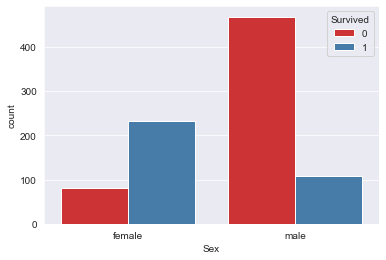

In [522]:
sns.countplot(data=df_train,x="Sex",hue="Survived",palette="Set1")

Remaining Categories Features Columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


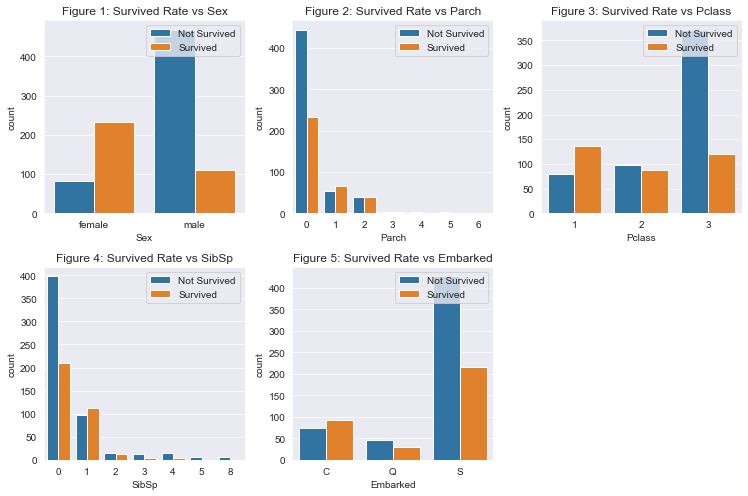

In [523]:
cols=['Sex','Parch','Pclass','SibSp','Embarked']
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(cols):
            ax_i=axs[r][c]
            sns.countplot(df_train[cols[i]],hue=df_train['Survived'],ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survived Rate vs {cols[i]}")
            ax_i.legend(title='',loc='upper right',labels=['Not Survived','Survived'])
axs.flat[-1].set_visible(False)  #Bỏ hiển thị biểu đồ cuối cùng
plt.tight_layout()
plt.show()


### Tổng quan đánh giá và nhận xét về sự phân bố của dữ liệu
    + Tỉ lệ sống sót của nữ > nam
    + Phần lớn người tời từ Southampton và đa phần không sống sót
    + Phần lớn người tời từ SibSp đa phần không sống sót, nhóm 1 người-2 người tỉ lệ sống sót cao hơn
    + Người đi một mình tỉ lệ sống sót cao hơn
    + Phần lớn người đi cùng Parch đều không sống sót

### 3.2 EDA for Numerical Features

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

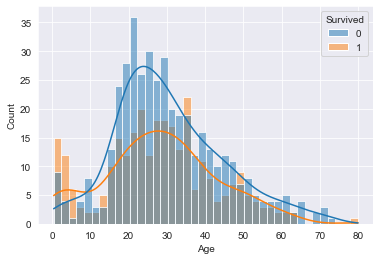

In [524]:
sns.histplot(data=df_train,x="Age",hue="Survived",kde=True,bins=40)

### Fare

In [525]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

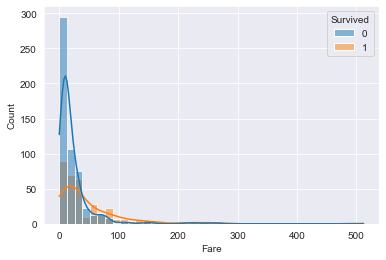

In [526]:
sns.histplot(data=df_train,x="Fare",hue="Survived",kde=True,bins=40)

In [527]:
#To name for 0-25
fare_categories=['Economical','Standard','Expensive','Luxury']
quartile_data=pd.qcut(df_train['Fare'],q=4,labels=fare_categories)

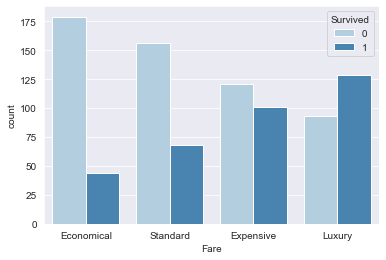

In [528]:
sns.countplot(x=quartile_data, hue=df_train['Survived'], palette='Blues');

In [529]:
df_train['Survived']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

### 4.Features Engineering
- Regular Expression

In [530]:
df_train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [531]:
import re

def extract_title(name):
    p=re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

df_train['Title']=df_train['Name'].apply(lambda name: extract_title(name))

In [532]:
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [533]:
df_test['Title']=df_test['Name'].apply(lambda name: extract_title(name))

In [534]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

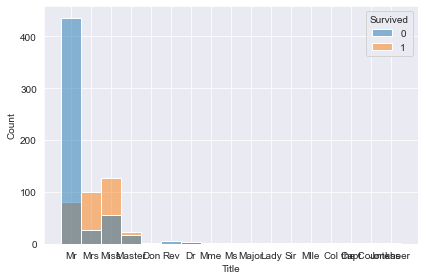

In [535]:
sns.histplot(data=df_train,x="Title",hue='Survived')
plt.tight_layout()
plt.show()

In [536]:
def group_title(title):
    if title in ['Mr','Mrs','Master','Miss']:
        return title
    elif title =='Ms':
        return 'Miss'
    else:
        return 'Others'

df_train['Title']=df_train['Title'].apply(lambda title: group_title(title))
df_test['Title']=df_test['Title'].apply(lambda title: group_title(title))

In [537]:
df_train['Title']

PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
        ...  
887    Others
888      Miss
889      Miss
890        Mr
891        Mr
Name: Title, Length: 891, dtype: object

### Family

- Sibp

In [538]:
df_train['Family_Size']=df_train['SibSp'].astype('int')+df_train['Parch'].astype('int')+1

In [539]:
df_test['Family_Size']=df_test['SibSp'].astype('int')+df_test['Parch'].astype('int')+1

In [540]:
df_train['Family_Cut']=pd.cut(df_train['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large']) #Cắt dữ liệu thành các nhóm từ 0-1,1-4,4-6,6-20

In [541]:
df_test['Family_Cut']=pd.cut(df_test['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

<AxesSubplot:xlabel='Family_Cut', ylabel='count'>

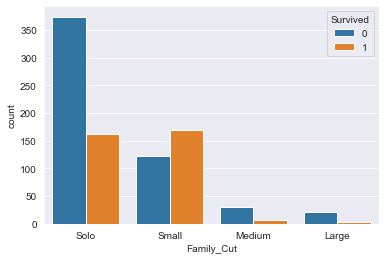

In [542]:
sns.countplot(data=df_train,x='Family_Cut',hue='Survived')

### Data Wrangling(Chuẩn hóa dữ liệu)

In [543]:
num_features=['Age','Fare']
cate_features=['Sex','Pclass','Embarked','Title','Family_Cut']
features_columns=num_features+cate_features
print(features_columns)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cut']


In [544]:
def display_missing(df,features_columns):
    n_rows=df_train.shape[0]
    for col in features_columns:
        missing_count=df_train[col].isnull().sum()
        if missing_count>0:
            print(f"{col} has {missing_count} missing values")
display_missing(df_train,features_columns)
display_missing(df_test,features_columns)

Age has 177 missing values
Embarked has 2 missing values
Age has 177 missing values
Embarked has 2 missing values


### Fill missing values

- Age

In [545]:
age_by_sex_pclass=df_train.groupby(['Sex','Pclass']).median()['Age']

In [546]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [547]:
df_train['Age']=df_train.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [548]:
df_test['Age']=df_test.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [549]:
display_missing(df_train,features_columns)
display_missing(df_test,features_columns)

Embarked has 2 missing values
Embarked has 2 missing values


In [550]:
x=df_train[features_columns]
y=df_train['Survived']

In [551]:
X_test=df_test[features_columns]

In [552]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [553]:
num_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])


In [554]:
cat_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [555]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cate_features)
])

In [556]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cut'])])

In [557]:
x=preprocessor.transform(x) #Chuyển dữ liệu thành ma trận #X-->X_train,X_val

In [558]:
X_test=preprocessor.transform(X_test)

In [559]:
from sklearn.model_selection import train_test_split

In [560]:
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=0) #Tách tập train thaành  train và val ới tỉ lệ 80 train-20 test

In [561]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix

In [562]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [563]:
X_test.shape

(418, 19)

In [564]:
logicstic_regression=LogisticRegression(solver='liblinear',max_iter=1000)
logicstic_regression.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [565]:
logicstic_regression.score(X_val,y_val)

0.8212290502793296

In [566]:
y_pred=logicstic_regression.predict(X_val)

In [567]:
precision_score(y_val,y_pred), recall_score(y_val,y_pred), f1_score(y_val,y_pred), accuracy_score(y_val,y_pred)

(0.7605633802816901, 0.782608695652174, 0.7714285714285714, 0.8212290502793296)

In [568]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [569]:
from sklearn.preprocessing import PolynomialFeatures

In [570]:
poly=PolynomialFeatures(degree=2)

In [571]:
poly_features_Xtrain=poly.fit_transform(X_train)

In [572]:
poly_features_Xval=poly.fit_transform(X_val)

In [573]:
logicstic_regression=LogisticRegression(solver='liblinear',max_iter=1000)
logicstic_regression.fit(poly_features_Xtrain,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [574]:
logicstic_regression.score(poly_features_Xval,y_val)

0.8268156424581006

In [575]:
y_pred=logicstic_regression.predict(poly_features_Xval)

In [576]:
precision_score(y_val,y_pred), recall_score(y_val,y_pred), f1_score(y_val,y_pred), accuracy_score(y_val,y_pred)

(0.8064516129032258,
 0.7246376811594203,
 0.7633587786259542,
 0.8268156424581006)

### Decision Tree

In [577]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=2023)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2023)

In [578]:
decision_tree.score(X_val,y_val)

0.8156424581005587

### Cross Validation

In [579]:
from sklearn.model_selection import cross_val_score

In [580]:
logicstic_regression_cv=LogisticRegression(solver='liblinear',max_iter=1000)

In [581]:
dt_cv=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=2023)

In [582]:
lr_scores=cross_val_score(logicstic_regression_cv,X_train,y_train,scoring='accuracy',cv=5)

In [583]:
lr_scores

array([0.81118881, 0.84615385, 0.79577465, 0.80985915, 0.86619718])

In [584]:
lr_scores.mean(), lr_scores.std()

(0.8258347286516301, 0.026135510611751768)

In [585]:
dt_scores = cross_val_score(dt_cv, x, y, scoring='accuracy', cv=5)

In [586]:
dt_scores.mean(), dt_scores.std()

(0.8148389931579938, 0.01240557058523914)

### Baseline Model Comparison
- XGBoost
- Knearst Neighbors
- Random Forest
- Logistic Regression
- Support Vector Machine
- AdaBoost
- ExtraTreesClassifier

In [587]:
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression

In [588]:
models=[LinearSVC(random_state=2023),SVC(random_state=2023),LogisticRegression(solver='liblinear',max_iter=1000),RandomForestClassifier(random_state=2023),XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=2023),KNeighborsClassifier(metric='minkowski',p=2),AdaBoostClassifier(),ExtraTreesClassifier()]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
def generate_baseline_results(models,x,y,metrics,cv=5,plot_results=False):
    kfold=StratifiedKFold(cv,shuffle=True,random_state=2023)
    entries=[]
    for model in models:
        model_name=model.__class__.__name__
        scores=cross_val_score(model,x,y,scoring=metrics,cv=kfold)
        for fold_idx,score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_results

generate_baseline_results(models,X_train,y_train,metrics='accuracy',cv=5,plot_results=False)